<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div> 

Copyright © 2021 Theodore G. Cleveland and Farhang Forghanparast

Last GitHub Commit Date: 16 Mar 2021
    
# 23: Testing Hypothesis (continued) 
- Attained significance (p-value)

*Hypothesis Testing* A procedure to systematically decide if two data collections are similar or substantially different by comparing descriptive statistics (typically mean and variance).

<!--![](https://www.thermofisher.com/blog/wp-content/uploads/sites/11/2018/01/istock-829172394_redumbrella.jpg)-->

## Objectives
- To apply fundamental concepts involved in probability estimation modeling and descriptive statistics;
  - Use of non-standard external module
  - Use of graphics to visualize hypothesis tests

---

## Computational Thinking Concepts
The CT concepts include:

- Abstraction => Represent data behavior with a statistic 
- Pattern Recognition => Compare patterns in (our) data models to make a decision
---

Lets actually examine the course textbook:
[https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

There is a "secret" module you need to install, without instructions of how!  Welcome to the world of obfuscation!

> To get access to the datascience library in the textbook you use pip. <br>
> On my server I did: `sudo -H /opt/jupyterhub/bin/python3 -m pip install datascience` <br>
> On your anaconda environment the following might work: <br>
> `! pip install datascience` <= put this into a Jupyter code cell and run it once!
    

In [1]:
# ! pip install datascience - activate if import fails
import datascience
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
#required to get kernel to render the image
%matplotlib inline 

## Mendel's Pea Flowers

Gregor Mendel (1822-1884) was an Austrian monk who is widely recognized as the founder of the modern field of genetics. 

<img src="http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson17/gotitfrommymama.jpg" style="padding-right: 10px; padding-left: 10px;" width="200" align="left">

Mendel performed careful and large-scale experiments on plants to come up with fundamental laws of genetics.
Many of his experiments were on varieties of pea plants. He formulated sets of assumptions about each variety; these were his models. He then tested the validity of his models by growing the plants and gathering data.

<img src="http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson17/mendels-garden.jpg" style="padding-right: 10px; padding-left: 10px;" width="200" align="right" >

Let's analyze the data from one such experiment to see if Mendel's model was good.

In a particular variety, each plant has either purple flowers or white. The color in each plant is unaffected by the colors in other plants. Mendel hypothesized that the plants should bear purple or white flowers at random, in the ratio 3:1. 

### *Mendel's Model*

For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

### Approach to Assessment

To go about assessing Mendel's model, we can simulate plants under the assumptions of the model and see what it predicts. Then we will be able to compare the predictions with the data that Mendel recorded.
The Statistic

Our goal is to see whether or not Mendel's model is good. We need to simulate a statistic that will help us make this decision.

If the model is good, the percent of purple-flowering plants in the sample should be close to 75%. If the model is not good, the percent purple-flowering will be away from 75%. It may be higher, or lower; the direction doesn't matter.

The key for us is the distance between 75% and the percent of purple-flowering plants in the sample. Big distances are evidence that the model isn't good.

> Our statistic, therefore, is the distance between the sample percent and 75%: <br><br>
> $\text{Distance} = ~∣\frac{\text{sample percent of purple}}{\text{flowering plants}}|−75\%$

### Predicting the Statistic Under the Model

To see how big the distance would be if Mendel's model were true, we can use sample_proportions to simulate the distance under the assumptions of the model.

First, we have to figure out how many times to sample. To do this, remember that we are going to compare our simulation with Mendel's plants. So we should simulate the same number of plants that he had.

Mendel grew a lot of plants. There were 929 plants of the variety corresponding to this model. So we have to sample 929 times.
Generating One Value of the Statistic

The steps in the calculation:

>Sample 929 times at random from the distribution specified by the model and find the sample proportion in the purple-flowering category. <br>
>Multiply the proportion by 100 to get a pecent.<br>
>Subtract 75 and take the absolute value of the difference.<br>

That's the statistic: the distance between the sample percent and 75.

We will start by defining a function that takes a proportion and returns the absolute difference between the corresponding percent and 75.


In [2]:
def distance_from_75(p):
    return abs(100*p - 75)

To simulate one value of the distance between the sample percent of purple-flowering plants and 75%, under the assumptions of Mendel's model, we have to first simulate the proportion of purple-flowering plants among 929 plants under the assumption of the model, and then calculate the discrepancy from 75%.

In [3]:
model_proportions = [0.75, 0.25]

In [4]:
proportion_purple_in_sample = datascience.sample_proportions(929, model_proportions).item(0)
distance_from_75(proportion_purple_in_sample)
#proportion_purple_in_sample

1.8568353067814911

That's one simulated value of the distance between the sample percent of purple-flowering plants and 75% as predicted by Mendel's model.
### Running the Simulation

To get a sense of how variable the distance could be, we have to simulate it many more times.

We will generate 10,000 values of the distance. As before, we will first use the code we developed above to define a function that returns one simulated value Mendel's hypothesis.


In [5]:
def one_simulated_distance():
    proportion_purple_in_sample = datascience.sample_proportions(929, model_proportions).item(0)
    return distance_from_75(proportion_purple_in_sample)

Next, we will use a for loop to create 10,000 such simulated distances.

In [6]:
distances = datascience.make_array()

repetitions = 10000
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())
    
len(distances);
#distances[999]

### The Prediction

The empirical histogram of the simulated values shows the distribution of the distance as predicted by Mendel's model.  First we will plot a histogram of the simulated distances, small values (close to zero) are supportive of Mendel's model, larger values are not.


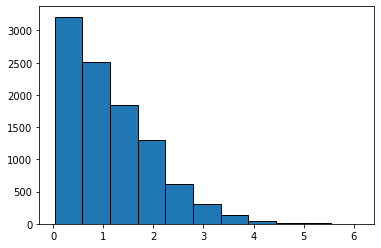

In [7]:
plt.hist(distances,11)
plt.show()

Here we see that the majority of the distances are between 0-1, lets find the value of distance for the 25%,50%,75%, and 99%

In [8]:
quants = np.quantile(distances,[0.25,0.50,0.75,0.99])
print('25 % of the distances are between 0 and ',round(quants[0],2))
print('50 % of the distances are between 0 and ',round(quants[1],2))
print('75 % of the distances are between 0 and ',round(quants[2],2))
print('99 % of the distances are between 0 and ',round(quants[3],2))

25 % of the distances are between 0 and  0.46
50 % of the distances are between 0 and  0.94
75 % of the distances are between 0 and  1.64
99 % of the distances are between 0 and  3.69


The median distance is slightly less than 1, so for any single experiment half the time we expect distances less than 1, half greater.

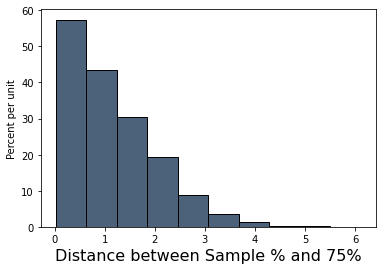

In [9]:
datascience.Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()



Look on the horizontal axis to see the typical values of the distance, as predicted by the model. They are rather small. For example, a high proportion of the distances are in the range 0 to 1, meaning that for a high proportion of the samples, the percent of purple-flowering plants is within 1% of 75%, that is, the sample percent is in the range 74% to 76%.

### Comparing the Prediction and the Data

To assess the model, we have to compare this prediction with the data. Mendel recorded the number of purple and white flowering plants. In an actual experiment of the 929 plants that he grew, 705 were purple flowering. That's just about 75.89%.


In [10]:
100*round(705 / 929, 4)

75.89

So the `observed value` of our statistic – the distance between Mendel's sample percent and 75 – is about 0.89:

In [11]:
observed_statistic = distance_from_75(705/929)
round(observed_statistic, 2)

0.89



Just by eye, locate roughly where 0.89 is on the horizontal axis of the histogram. You will see that it is clearly in the heart of the distribution predicted by Mendel's model.

The cell below redraws the histogram with the observed value plotted on the horizontal axis.


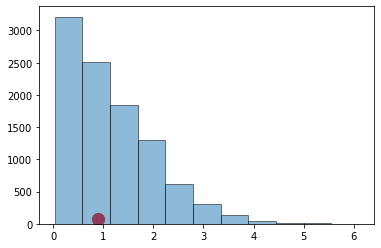

In [12]:
plt.hist(distances,11,alpha=0.5)
plt.scatter(observed_statistic, 75.00, color='red', s=150);
plt.show()

Here's the same plot using the datascience module - essentially helps decorate the plot.

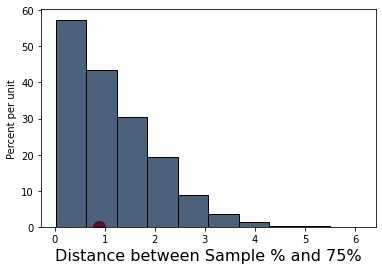

In [13]:
datascience.Table().with_column(
    'Distance between Sample % and 75%', distances
).hist() 
matplotlib.pyplot.scatter(observed_statistic, 0.00, color='red', s=150);

The observed statistic is like a typical distance predicted by the model. By this measure, the data are consistent with the histogram that we generated under the assumptions of Mendel's model. This is evidence in favor of the model.

We can further find the quantile associated with the observed statistic.

In [14]:
qvalue=0.0 #quantile value to start
tolerance=0.0001
how_many= int(1/tolerance)
for i in range(how_many): #brute force search
    how_close = observed_statistic-np.quantile(distances,qvalue)
    if how_close >= tolerance:
        qvalue = qvalue+tolerance
        #print(how_close,qvalue)
    if how_close < tolerance:
        #print(how_close,qvalue)
        break
print('The observed statistic :',round(observed_statistic,3),'is smaller than ',round(100*(1.0-qvalue),3),' percent of the simulated sample')

The observed statistic : 0.888 is smaller than  54.85  percent of the simulated sample


This example is the essence of hypothesis tests that are conducted in all fields in which theory can be compared to observation.

Here we used simulation to replicate many prospective experiments, by randomly sampling from a population that had the desired proportions. 
Then compared an actual experiment, to the simulated population behavoir using a histogram to learn where our measurement (test statistic) landed with respect to many other experiments.  Lastly, we can use quantiles (probability estimates) to judge the measurement's chance of occurance as compared to a random simulation of the correct behavior.  Here we found that our measurement is expected roughly half the time as compared to a random population **with the correct(null) proportions**

The next section formalizes these kinds of tests when the population is not available (bear in mind the rules are built using simulations, then common patterns emerge and we use the patterns)

---

## Elements of a Statistical Test
The four essential elements are:

1. null hypothesis, $H_0$
2. alternative hypothesis, $H_a$
3. a test statistic 
4. a rejection region

### 

Suppose we wish to test a hypothesis concerning a parameter $\theta$ based on a random sample $Y_1,Y_2, \dots ,Y_n$ from which we compute an estimate named $\hat\theta$.  Assume for this lesson that the estimator has an approximately normical distribution with mean $\theta$ and variance $\sigma_{\hat\theta}^2$

Suppose $\theta_0$ is a particular (target) value of $\theta$, we wish to test $H_0:\theta = \theta_0$ versus $H_a:\theta > \theta_0$.

The figure below depicts sampling distributions of $\hat\theta$ for different values of $\theta$, including one that happens to center on $\theta_0$

<img src="http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson17/samplngDists.png" style="padding-right: 10px; padding-left: 10px;" width="300" >

If $\hat\theta$ is close to $\theta_0$, it is reasonable to accept  $H_0$. 
However if $\theta > \theta_0$, it is more likely that $\hat\theta$ is going to be large.

Thus large values of $\hat\theta$ (larger than $\theta_0$) favor the rejection of $H_0:\theta = \theta_0$ and the acceptance of $H_a:\theta > \theta_0$.  Using the 4 elements as a guide, we can concisely state :

|item|value| 
|:---|:---|
|$H_0$|$\theta = \theta_0$|
|$H_a$|$\theta > \theta_0$|
|Test Statistic|$\hat\theta$|
|Rejection Region|$RR = \hat\theta > k$ for some choice of $k$|

The actual value of $RR$ is determined by setting the type-I-error prbability $\alpha$ and choosing $k$ accordingly, such as in the figure below.

<img src="http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson17/type1.png" style="padding-right: 10px; padding-left: 10px;" width="300" >

If $H_0$ is true, $\hat\theta$ having an approximately normal distribution with mean $\theta_0$ and variance $\sigma_{\hat\theta}^2$, if we desire a type-I-error probability of $\alpha$ then

$$k = \theta_0 + z_{\alpha} \sigma_{\hat\theta}$$

is the choice for $k$ where $P(Z > z_{\alpha}) = \alpha $ when $Z$ is a standard normal variate (our firend the Z-score).

Our $RR$ can be expressed as:

$$ RR = \hat\theta : \frac{\hat\theta - \theta_0}{\sigma_{\hat\theta}} > z_{\alpha}$$

Thus our test is:

|item|value| 
|:---|:------|
|$H_0$|$\theta = \theta_0$|
|$H_a$|$\theta> \theta_0$|
|Test Statistic|$Z=\frac{\hat\theta-\theta_0}{\sigma_{\hat\theta}}$ |
|Rejection Region|$z>z_{\alpha}$ for some value $\alpha$|

Recall we choose $\alpha$

### Example

A machine in a factory must be stopped and maintained when its defects exceede 10% on the daily production runs.   A random sample of 100 items from one day of production contain 15 defective items and the shop foreman claims the machine must be maintained/repaired.  Does the sample evidence support the foreman's assertion?

Lets apply our process.

$Y$ denotes the number of defectives.  $Y$ will be a binomial variate (with value TRUE/FALSE or 0/1) with a probability of one outcome of $p$ and the other $1-p$.  Kind of like an oddly weighted coin.  Lets say the defect outcome is the value $p$. We will assume 100 is large enough so that we can approximate the binomial with a Z-score statistic.

|item|value| 
|:---|:---|
|$H_0$|$p = 0.10$|
|$H_a$|$p > 0.10$|
|Test Statistic|$$Z=\frac{\hat p-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$$ |
|Rejection Region|$z>z_{\alpha}$ for some value $\alpha$|

Lets choose $\alpha = 0.01$ what is the value for $z_{\alpha}$?

In [15]:
import math
def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

sample_count = 100
defect_count = 15
phat = defect_count/sample_count
pzero = 0.10

z_test = (phat - pzero) / math.sqrt((pzero*(1.0-pzero))/(sample_count))

z_alpha =  2.325 #1.646 #2.325 #here we find by trial and error
quantile = 1-normdist(z_alpha,0,1)
print(quantile)
if z_test > z_alpha:
    print("Reject Ho","Test Statistic = ",round(z_test,3), "Rejection Value = ",round(z_alpha,3)," Type-I-error probability = ",round(quantile,6))
else:
    print("Do Not Reject Ho","Test Statistic = ",round(z_test,3), "Rejection Value = ",round(z_alpha,3)," Type-I-error probability = ",round(quantile,6))

# or we can compute p-value

pvalue = 1-normdist(z_test,0,1)

print("P-value at rejection = ",round(pvalue,6))
    

0.010035980100274067
Do Not Reject Ho Test Statistic =  1.667 Rejection Value =  2.325  Type-I-error probability =  0.010036
P-value at rejection =  0.04779


Now lets examine the actual defect distribution by simulation

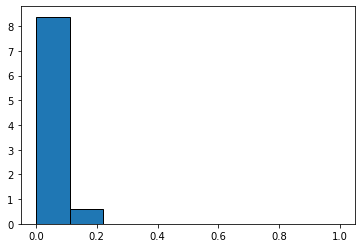

In [16]:
import random
import matplotlib.pyplot as plt

def sample_parts(how_many,proportion):
    sample_list = [] #empty list to store results
    for i in range(0,how_many):
        temp = random.uniform(0, 1)
        if temp <= proportion:
            sample_list.append(0)
        else:
            sample_list.append(1)
    return(sample_list)

#machine_parts = sample_parts(100,0.10)
#plt.hist(machine_parts, density = False)
#plt.show()

# simulate sampling then computing the defect rate
defect_rate = []

for j in range(1,5000): #change from 10 to 50,70,90,100,1000,2000,3000
    machine_parts = sample_parts(j,0.10)
    sample_count = len(machine_parts)
    defect_count = sample_count - sum(machine_parts)
    defect_rate.append(defect_count/sample_count)

plt.hist(defect_rate,bins=9,density = True)
#matplotlib.pyplot.scatter(0.15, 0.00, color='red', s=66);
plt.show()

### A/B Testing

In modern data analytics, deciding whether two numerical samples come from the same underlying distribution is called A/B testing. The name refers to the labels of the two samples, A and B.

An example will illustrate the concept

### Example: Website Design: A practical example of A/B Testing
*inspired by an example in __"A/B Test Significance in Python"__ by __Samuel Hinton__ available at* https://cosmiccoding.com.au/tutorials/ab_tests <br>
![](https://www.invespcro.com/blog/images/blog-images/ab-test-1-1.jpg) <br>
Imagine you’re in charge of a website (e.g., an online videogame shop). You have the current version of the website (aka. "A"), but aren’t happy with it. For instance, you are not selling as much as you like. You want to change the design of the "Add to Cart" button (aka. "B") and maybe that will increase your sells. <br>
![](https://www.volusion.com/blog/content/images/wp/buttonaandbuttonn.jpg) <br>

you set up your website so that half the people are directed to the old website, and half to one where you’ve made your change. You have data from both, and want to know, with confidence, “Does the change I made increase the sells?”.<br>

*This is an A/B test. Often this is used interchangably with the term “split testing”, though in general A/B tests test small changes, and split testing might be when you present two entirely different websites to the user.* <br>

#### Why not just change the website and monitor it for a week?
>Good question - by having two sites active at once and randomly directing users to one or the other, you control for all other variables. If one week later puts you the week before Christmas, this will impact sales, and you might draw the wrong conclusion because of these confounding effects.
#### Why is it not an A/B/C test?
> One can have as many perturbations running as you want, but got to keep the name simple. The more perturbations you try though, the smaller a number of samples you’ll have for each case, and the harder it will be to draw statistically significant conclusions.

Let us assume you have 1000 users, 550 were directed to site A, 450 to site B. In site A, 48 users made a purchase. In site B, 56 users made a purchase. Is this a statistically significant result?

In [17]:
num_a= 550
num_b = 450
click_a= 48
click_b = 56
rate_a= click_a / num_a
rate_b = click_b / num_b
print(rate_a)
print(rate_b)

0.08727272727272728
0.12444444444444444


You can click a button, or not. Two discrete options are available, so this is a textbook binomial distribution, with some unknown rate for site A and site B. We don’t know the true click rate, but we can estimate it using our small sample.

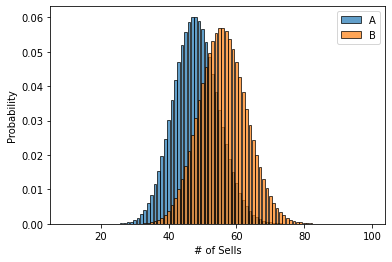

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Determine the probability of having x number of clicks - Binomial Dist.
clicks = np.arange(10, 100)
prob_a = binom(num_a, rate_a).pmf(clicks)
prob_b = binom(num_b, rate_b).pmf(clicks)

# Make the bar plots.
plt.bar(clicks, prob_a, label="A", alpha=0.7)
plt.bar(clicks, prob_b, label="B", alpha=0.7)
plt.legend()
plt.xlabel("# of Sells"); plt.ylabel("Probability");

So we can see here that b has an edge, but its certaintly possible if we pick two random points according to the histograms for A and B, that A might actually be higher than B! <Br>
    
As we’re interested in the average # of sells, this averaging of an underlying distribution means our final estimate will be well approximated by a normal distribution. So let’s reformulate, using the normal approximation here:

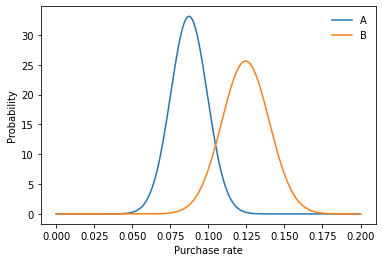

In [19]:
from scipy.stats import norm

# Where does this come from? See this link: https://en.wikipedia.org/wiki/Binomial_distribution#Normal_approximation
std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)

click_rate = np.linspace(0, 0.2, 200)
prob_a = norm(rate_a, std_a).pdf(click_rate)
prob_b = norm(rate_b, std_b).pdf(click_rate)

# Make the bar plots.
plt.plot(click_rate, prob_a, label="A")
plt.plot(click_rate, prob_b, label="B")
plt.legend(frameon=False)
plt.xlabel("Purchase rate"); plt.ylabel("Probability");

This is also a better plot than the first one, because we’ve removed the confusing effect of site A and site B having a slightly different number of visitors had. So our question is still the same: What is the chance that a draw from B is higher than a draw from A. Is it significant? <br>

To answer this, let us utilise the handy fact that the sum (or difference) of normally distributed random numbers is also normally distributed. This is simple - take the difference in the means and sum the variance. We’ll do two things below: First, get the z-score, and second, plot the proper distribution.

zscore is 1.890, with p-value 0.029


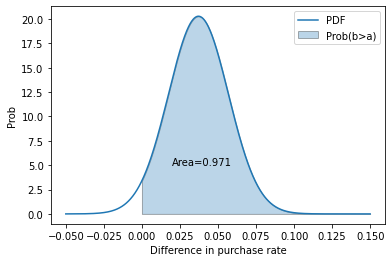

In [20]:
z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))

x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(b>a)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in purchase rate"); plt.ylabel("Prob");

print(f"zscore is {z_score:0.3f}, with p-value {norm().sf(z_score):0.3f}")

we can say that given the null hypothesis ("B is less than or equal to A") is true , we would expect to get this result or a result more extreme only 2.9% of the time. As that is a significant result (typically p < 5%), we reject the null hypothesis, and state that we have evidence that B > A. <br>
> We’ve made a lot of plots for this to try and explain the concept. You can easily write a tiny function to simplify all of this. Whether you want the confidence or the p-value just means changing the final "norm.cdf" to "norm.sf".

In [21]:
def get_confidence_ab_test(click_a, num_a, click_b, num_b):
    rate_a = click_a / num_a
    rate_b = click_b / num_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / num_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / num_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return norm.sf(z_score)

print(get_confidence_ab_test(click_a, num_a, click_b, num_b))

0.029402650172421833


Remember Non-parametric Statistical Hypothesis Tests? We can use them here as well! <br>

Imagine we have the raw results of clicks (purchases), as 0s or 1s, as our distribution.

In [22]:
from scipy.stats import mannwhitneyu

a_dist = np.zeros(num_a)
a_dist[:click_a] = 1
b_dist = np.zeros(num_b)
b_dist[:click_b] = 1

stat, p_value = mannwhitneyu(a_dist, b_dist, alternative="less")
print(f"Mann-Whitney U test for null hypothesis B <= A is {p_value:0.3f}")

Mann-Whitney U test for null hypothesis B <= A is 0.028


___

## References

1. https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html

2.  __"Implementing A/B Tests in Python"__ by __Robbie Geoghegan__  https://medium.com/@robbiegeoghegan/implementing-a-b-tests-in-python-514e9eb5b3a1 <br>
3.  __"The Math Behind A/B Testing with Example Python Code"__ by __Nguyen Ngo__  https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f <br>
4.  __"A/B Testing"__  https://www.optimizely.com/optimization-glossary/ab-testing/ <br>
5. __"A/B Testing Guide"__  https://vwo.com/ab-testing/ <br>

<hr>

## Laboratory 23

**Examine** (click) Laboratory 23 as a webpage at [Laboratory 23.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab23/Lab23.html)

**Download** (right-click, save target as ...) Laboratory 23 as a jupyterlab notebook from [Laboratory 23.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab23/Lab23.ipynb)


<hr><hr>

## Exercise Set 23

**Examine** (click) Exercise Set 23 as a webpage at [Exercise 23.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab23/Lab23-TH.html)

**Download** (right-click, save target as ...) Exercise Set 23 as a jupyterlab notebook at  [Exercise Set 23.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab23/Lab23-TH.ipynb)



Code below to figure out how to manipulate histograms, leave here until decide where in notes script belongs

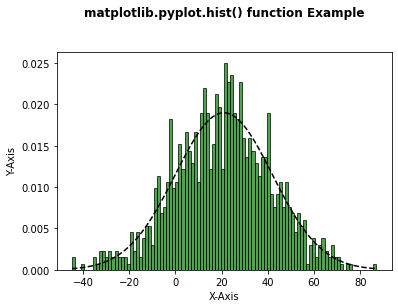

In [23]:

# Implementation of matplotlib function 
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt 
   
np.random.seed(10**7) 
mu = 21 
sigma = 21
x = mu + sigma * np.random.randn(1000) 
   
num_bins = 100
   
n, bins, patches = plt.hist(x, num_bins,  
                            density = 1,  
                            color ='green', 
                            alpha = 0.7) 
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) 
  
plt.plot(bins, y, '--', color ='black') 
  
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis') 
  
plt.title('matplotlib.pyplot.hist() function Example\n\n', 
          fontweight ="bold") 
  
plt.show() 
